In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Time evolution of centers

In [3]:
subject = 1
run = 1
cluster_n = 2
data_lying = pd.read_csv('clustering_results/subject_{}/run_{}/lying/{}_clusters.csv'.format(subject, run, cluster_n))
data_walking = pd.read_csv('clustering_results/subject_{}/run_{}/walking/{}_clusters.csv'.format(subject, run, cluster_n))

In [82]:
# plot the clusters centers
def plot_centers(subject, run, nclusters, xlim_lying=None, ylim_lying=None, xlim_walking=None, ylim_walking=None):
    """
    plot the clusters centers for a given subject, run and nclusters
    """
    data_lying = pd.read_csv('clustering_results/subject_{}/run_{}/lying/{}_clusters.csv'.format(subject, run, nclusters))
    data_walking = pd.read_csv('clustering_results/subject_{}/run_{}/walking/{}_clusters.csv'.format(subject, run, nclusters))

    colors = ["#cc0066", "#FF9100", "#0080FF", "#00CC00"]
    mypalette = sns.set_palette(sns.color_palette(colors))
    sns.set_theme(style="white", font_scale=2, palette='Dark2')
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))

    
    LINEWIDTH = 3
    for i in range(nclusters):
        ax[0].plot (data_lying['MILLISEC'], data_lying['center {}'.format(i)], 
            label='lying center {}'.format(i), linewidth=LINEWIDTH)
        ax[1].plot (data_walking['MILLISEC'], data_walking['centers {}'.format(i)],
            label='walking center {}'.format(i), linewidth=LINEWIDTH)

    ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
    if xlim_lying is not None: ax[0].set_xlim(xlim_lying)
    if ylim_lying is not None: ax[0].set_ylim(ylim_lying)
    ax[0].set_xlabel('Time (ms)')
    ax[0].set_ylabel('Signal')

    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
    if xlim_walking is not None: ax[1].set_xlim(xlim_walking)
    if ylim_walking is not None: ax[1].set_ylim(ylim_walking)
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Signal')

    fig.savefig('clustering_results/subject_{}/run_{}/{}_clusters_centers.pdf'.format(subject, run, nclusters), bbox_inches='tight')

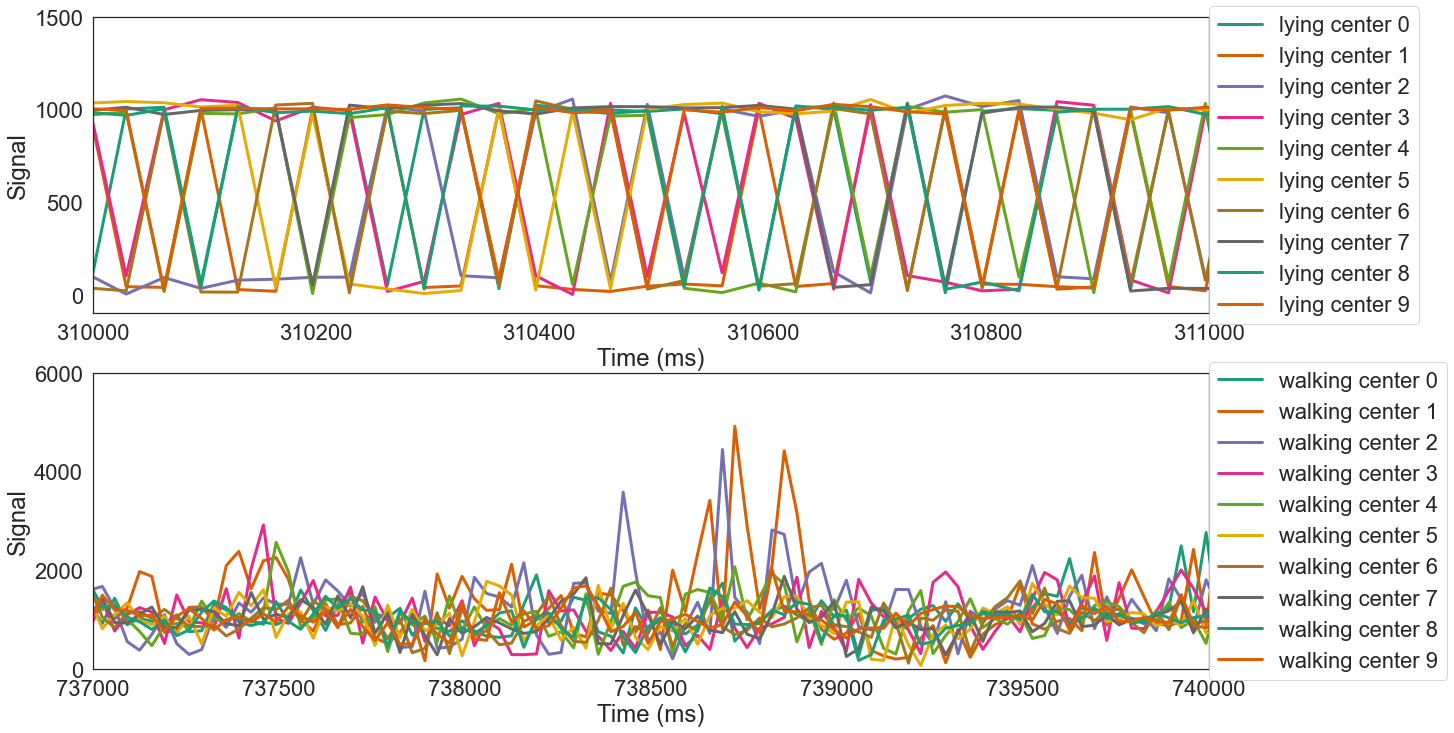

In [90]:
plot_centers(1, 1, 10, (0.31e6, 0.311e6), (-100, 1500),(0.737e6, 0.74e6),(-10, 6000))
